In [4]:
import pandas as pd
import numpy as np

from sqlalchemy.engine import URL
from sqlalchemy import create_engine

connection_string = 'DRIVER={SQL Server};SERVER=LAPTOP-2T0TBBUP\SQLEXPRESS;DATABASE=MoviesDB;Trusted_Connection=yes'
connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": connection_string})
engine = create_engine(connection_url)
query = "SELECT * FROM moviesAnalysis"
movies = pd.read_sql(query, engine)

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9042 entries, 0 to 9041
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               9042 non-null   int64  
 1   Name             9042 non-null   object 
 2   Genres           9042 non-null   object 
 3   RatingName       8740 non-null   object 
 4   Year             9042 non-null   int64  
 5   Month            7801 non-null   object 
 6   OscarWinSum      9042 non-null   int64  
 7   NominatedNumber  9042 non-null   int64  
 8   Gross            7813 non-null   float64
 9   Budget           7813 non-null   float64
 10  DurationMinutes  8949 non-null   float64
 11  VotesNumber      8871 non-null   float64
 12  ImbdScore        8929 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 918.5+ KB


In [5]:
movies.head()

,id,Name,Genres,RatingName,Year,Month,OscarWinSum,NominatedNumber,Gross,Budget,DurationMinutes,VotesNumber,ImbdScore
0,1,#Saraitda,Action-Drama-Horror,TV-MA,2020,None,0,0,NaN,NaN,98.0,32671.0,6.3
1,2,(500) Days of Summer,Romance-Drama-Comedy,PG-13,2009,None,0,0,NaN,NaN,95.0,489549.0,7.7
2,3,*batteries not included,Comedy,PG,1987,December,0,0,65088797.0,25000000.0,106.0,32000000.0,6.7
3,4,[Rec],Thriller-Horror-Mystery,R,2007,None,0,0,NaN,NaN,78.0,172050.0,7.4
4,5,[Rec]²,Horror,R,2009,October,0,0,18853164.0,5600000.0,85.0,70000000.0,6.5


Перевіримо, чи має дата фрейм пропущені значення:

In [6]:
movies.isnull().values.any()

True

Тепер перевіримо наявність від'ємних значень:

In [7]:
(movies.select_dtypes(include=np.number) < 0).values.any()

False

<AxesSubplot:>

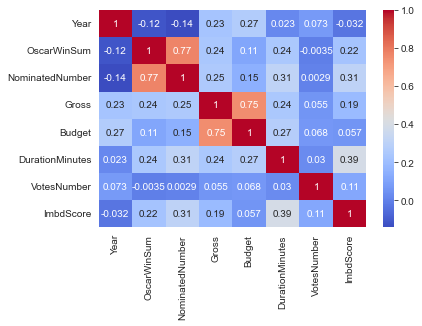

In [8]:
import seaborn as sb

corr = movies[['Year', 'Month', 'OscarWinSum', 'NominatedNumber', 'Gross', 'Budget', 'DurationMinutes', 'VotesNumber', 'ImbdScore']].corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.color_palette("coolwarm", as_cmap=True))



<AxesSubplot:>

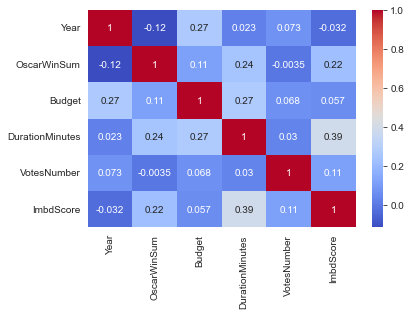

In [9]:
# movies.drop(['NominatedNumber', 'Gross'], axis=1, inplace=True)

corr = movies[['Year', 'Month', 'OscarWinSum', 'Budget', 'DurationMinutes', 'VotesNumber', 'ImbdScore']].corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sb.color_palette("coolwarm", as_cmap=True))

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
movies = movies.loc[movies['Budget'].notna() != 0]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 2 to 9039
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7813 non-null   int64  
 1   Name             7813 non-null   object 
 2   Genres           7813 non-null   object 
 3   RatingName       7724 non-null   object 
 4   Year             7813 non-null   int64  
 5   Month            7801 non-null   object 
 6   OscarWinSum      7813 non-null   int64  
 7   NominatedNumber  7813 non-null   int64  
 8   Gross            7813 non-null   float64
 9   Budget           7813 non-null   float64
 10  DurationMinutes  7813 non-null   float64
 11  VotesNumber      7759 non-null   float64
 12  ImbdScore        7813 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 854.5+ KB


In [12]:
numeric_columns = movies.select_dtypes(include=['number']).columns

means = movies[numeric_columns].mean()

movies[numeric_columns] = movies[numeric_columns].fillna(means)

movies.dropna(inplace=True)

movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7712 entries, 2 to 9039
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               7712 non-null   int64  
 1   Name             7712 non-null   object 
 2   Genres           7712 non-null   object 
 3   RatingName       7712 non-null   object 
 4   Year             7712 non-null   int64  
 5   Month            7712 non-null   object 
 6   OscarWinSum      7712 non-null   int64  
 7   NominatedNumber  7712 non-null   int64  
 8   Gross            7712 non-null   float64
 9   Budget           7712 non-null   float64
 10  DurationMinutes  7712 non-null   float64
 11  VotesNumber      7712 non-null   float64
 12  ImbdScore        7712 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 843.5+ KB


In [13]:

X = movies[['Genres', 'Year', 'OscarWinSum', 'Budget', 'DurationMinutes', 'VotesNumber']] # 'RatingName' # 'Month' 'NominatedNumber', 'Gross'
Y = movies[['ImbdScore']]



In [14]:
res = X['Genres'].str.get_dummies(sep='-').add_prefix('genres_')

X = pd.concat([X, res], axis = 1)
X.drop(columns=['Genres'], inplace=True)
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7712 entries, 2 to 9039
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              7712 non-null   int64  
 1   OscarWinSum       7712 non-null   int64  
 2   Budget            7712 non-null   float64
 3   DurationMinutes   7712 non-null   float64
 4   VotesNumber       7712 non-null   float64
 5   genres_Action     7712 non-null   int64  
 6   genres_Adventure  7712 non-null   int64  
 7   genres_Animation  7712 non-null   int64  
 8   genres_Biography  7712 non-null   int64  
 9   genres_Comedy     7712 non-null   int64  
 10  genres_Crime      7712 non-null   int64  
 11  genres_Drama      7712 non-null   int64  
 12  genres_Family     7712 non-null   int64  
 13  genres_Fantasy    7712 non-null   int64  
 14  genres_Fi         7712 non-null   int64  
 15  genres_Game       7712 non-null   int64  
 16  genres_History    7712 non-null   int64  


,Year,OscarWinSum,Budget,DurationMinutes,VotesNumber,genres_Action,genres_Adventure,genres_Animation,genres_Biography,genres_Comedy,...,genres_Mystery,genres_Reality,genres_Romance,genres_Sci,genres_Show,genres_Sport,genres_TV,genres_Thriller,genres_War,genres_Western
2,1987,0,25000000.0,106.0,32000000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2009,0,5600000.0,85.0,70000000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2016,0,15000000.0,103.0,306304.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1999,0,30000000.0,97.0,315247.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8,1983,0,4520000.0,101.0,7200000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# ageRating = X['RatingName'].get_dummies().add_prefix('language_')
#
# X = pd.concat([X, ageRating], axis = 1)
# X.drop(columns=['RatingName'], inplace=True)
# X.info()
# X.head()

In [16]:
# X = X.astype({col: 'int32' for col in X.select_dtypes('int64').columns})
#
# X.info()

In [17]:
# import scipy.stats as st
#
# columns = [
#     'budget',
#     'runtime',
#     'vote_average',
#     'year'
# ]
#
# for column in columns:
#     _, p = st.kstest(X[column], 'norm')
#     if p > 0.05:
#         print(column + ' should be removed from analysis')
#     else:
#         print(column + ' is important factor')

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [19]:
LinReg = LinearRegression().fit(X_train, Y_train)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

PolReg2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
PolReg2.fit(X_train, Y_train)

PolReg3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
PolReg3.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [21]:
models = [LinReg,
          PolReg2,
          PolReg3]

In [22]:
from sklearn.metrics import r2_score
from numpy import sqrt

RSE_scores = []
R2_scores = []

for model in models:
    y_true = np.array(Y_test)
    y_predicted = np.array(model.predict(X_test))
    RSE_scores.append(sqrt((np.sum(np.square(y_true - y_predicted)))/(len(y_true) - 2)))
    R2_scores.append(r2_score(Y_test, y_predicted))

print('RSE: ', RSE_scores)
print('R2: ', R2_scores)
print('RSE index min: ', np.argmin(RSE_scores) +1, RSE_scores[np.argmin(RSE_scores)])
print('R2 index max: ', np.argmax(R2_scores) + 1, R2_scores[np.argmax(R2_scores)])

RSE:  [0.810741597629941, 0.832318831217727, 5.264558586584597]
R2:  [0.2763902379048342, 0.23736111390007986, -29.51149098566947]
RSE index min:  1 0.810741597629941
R2 index max:  1 0.2763902379048342


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7712 entries, 2 to 9039
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              7712 non-null   float64
 1   OscarWinSum       7712 non-null   float64
 2   Budget            7712 non-null   float64
 3   DurationMinutes   7712 non-null   float64
 4   VotesNumber       7712 non-null   float64
 5   genres_Action     7712 non-null   float64
 6   genres_Adventure  7712 non-null   float64
 7   genres_Animation  7712 non-null   float64
 8   genres_Biography  7712 non-null   float64
 9   genres_Comedy     7712 non-null   float64
 10  genres_Crime      7712 non-null   float64
 11  genres_Drama      7712 non-null   float64
 12  genres_Family     7712 non-null   float64
 13  genres_Fantasy    7712 non-null   float64
 14  genres_Fi         7712 non-null   float64
 15  genres_Game       7712 non-null   float64
 16  genres_History    7712 non-null   float64


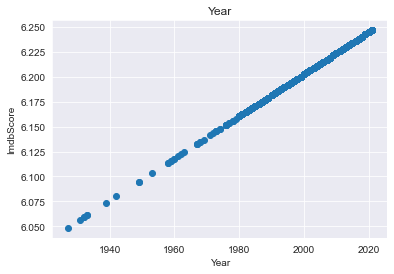

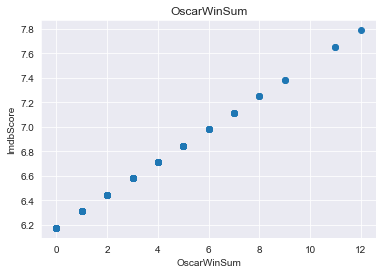

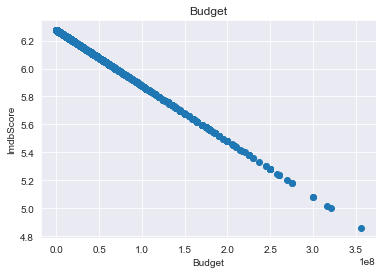

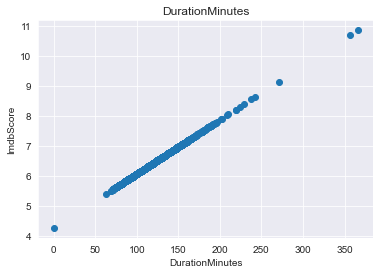

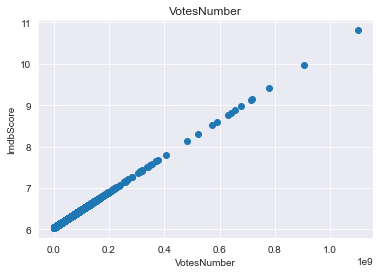

In [23]:
import matplotlib.pyplot as plt

columnsDisplay = ['Year', 'OscarWinSum', 'Budget', 'DurationMinutes', 'VotesNumber'] # 'NominatedNumber', 'Gross'

fixedValue = X.iloc[0]

fixed_df = X.copy(deep = True)
for column in X.columns:
    fixed_df[column] = fixedValue[column]

print(fixed_df.info())

for column in columnsDisplay:
    fixed_with_column = fixed_df.copy(deep = True)
    fixed_with_column[column] = X[column]
    yPred = LinReg.predict(fixed_with_column)
    plt.figure()
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('ImdbScore')
    plt.scatter(fixed_with_column[column], yPred)
    plt.show()

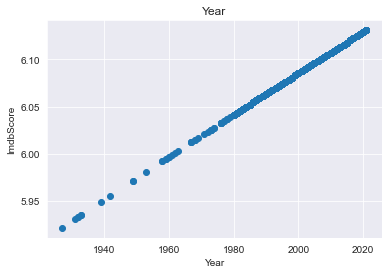

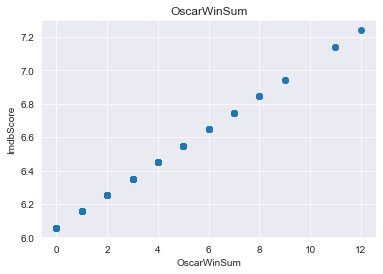

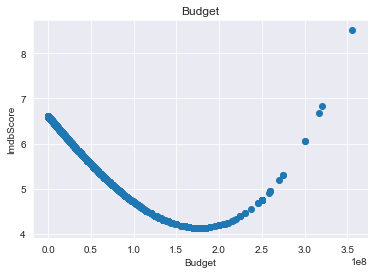

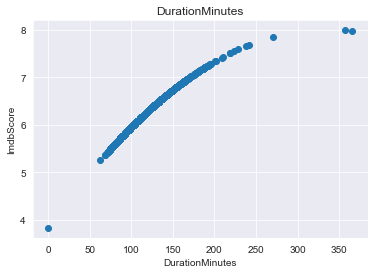

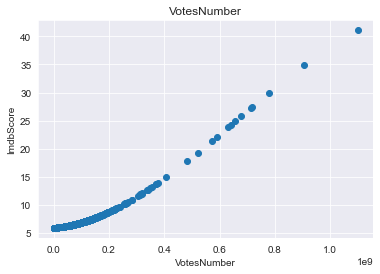

In [24]:
for column in columnsDisplay:
    fixed_with_column = fixed_df.copy(deep = True)
    fixed_with_column[column] = X[column]
    yPred = PolReg3.predict(fixed_with_column)
    plt.figure()
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('ImdbScore')
    plt.scatter(fixed_with_column[column], yPred)
    plt.show()

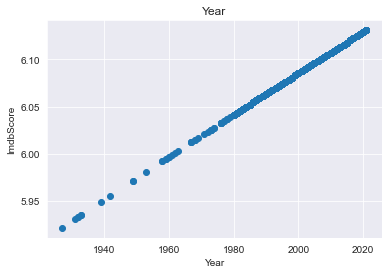

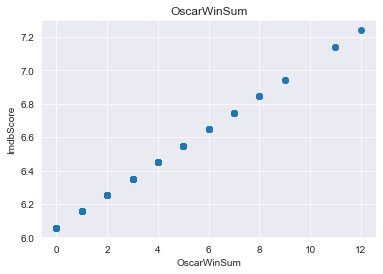

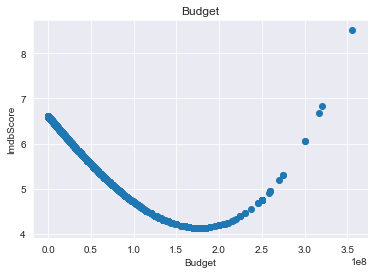

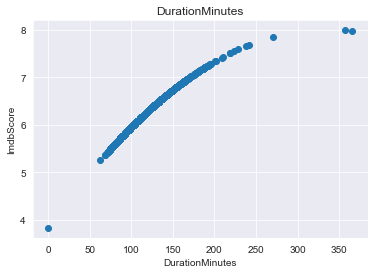

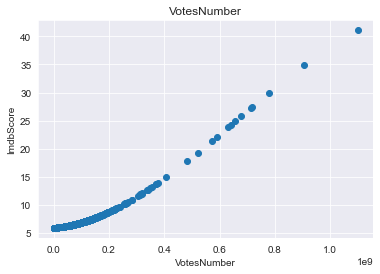

In [263]:
for column in columnsDisplay:
    fixed_with_column = fixed_df.copy(deep = True)
    fixed_with_column[column] = X[column]
    yPred = PolReg3.predict(fixed_with_column)
    plt.figure()
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('ImdbScore')
    plt.scatter(fixed_with_column[column], yPred)
    plt.show()